## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [15]:
import warnings 
warnings.filterwarnings('ignore')

In [16]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix



In [17]:
data=pd.read_csv(r'C:\Users\Ruchira\Desktop\supervised learning\students-data.csv',sep=';')

In [18]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [20]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [21]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [22]:
data.select_dtypes(include='object').columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [23]:
data.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [24]:
data.drop(['traveltime','studytime','failures','famrel','freetime','Dalc'],axis=1,inplace=True)

In [25]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [26]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

In [27]:
data[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']]=data[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']].apply(number.fit_transform)

In [28]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [29]:
arr = ['G1','G2','G3']
for i in range(len(arr)):
    for j in range(data.shape[0]):
        if data[arr[i]][j]>=10:
            data[arr[i]][j]=1
        else:
            data[arr[i]][j]=0

In [30]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [31]:
X = data.drop(["G3"], axis=1)
y = data[["G3"]]

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

(array([146.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 249.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

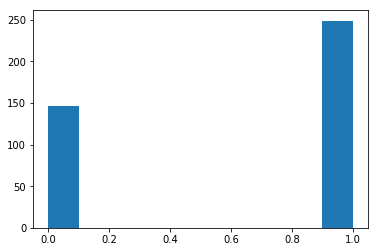

In [35]:
plt.hist(data.G2)

(array([130.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 265.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

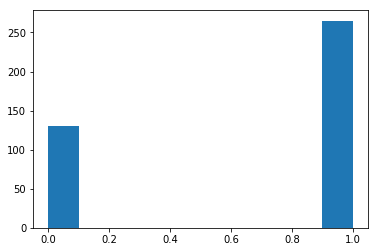

In [36]:
plt.hist(data.G3)

In [37]:
data.G2.corr(data.G3)

0.8253931159764696


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

(array([349.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  46.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

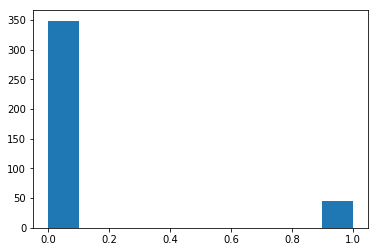

In [39]:
plt.hist(data.school)

(array([ 82., 104.,  98.,   0.,  82.,  24.,   0.,   3.,   1.,   1.]),
 array([15. , 15.7, 16.4, 17.1, 17.8, 18.5, 19.2, 19.9, 20.6, 21.3, 22. ]),
 <a list of 10 Patch objects>)

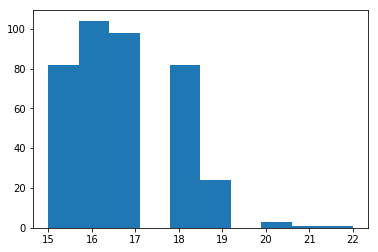

In [41]:
plt.hist(data.age)

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 50/350,random_state = 1)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [43]:
import statsmodels.api as sm

In [53]:
import numpy as np 
import matplotlib.pyplot as plt 
  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 

In [51]:
lm = sm.Logit(y,X)
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.207012
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     G3   No. Observations:                  395
Model:                          Logit   Df Residuals:                      369
Method:                           MLE   Df Model:                           25
Date:                Sun, 15 Sep 2019   Pseudo R-squ.:                  0.6733
Time:                        18:37:06   Log-Likelihood:                -81.770
converged:                       True   LL-Null:                       -250.25
                                        LLR p-value:                 2.131e-56
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
school        -0.1544      0.757     -0.204      0.838      -1.639       1.330
sex           -0.3072      0.532     -0.578      0.563      -1.350       0.735
age           -0.1555      0.109     -1.433      0.152      -0.368       0.057
address        0.0020      0.565      0.004      0.997      -1.105       1.109
famsize       -0.5549      0.526     -1.055      0.291      -1.585       0.476
Pstatus       -0.7810      0.757     -1.031      0.302      -2.265       0.703
Medu           0.1417      0.320      0.443      0.658      -0.485       0.768
Fedu          -0.6558      0.291     -2.255      0.024      -1.226      -0.086
Mjob           0.0036      0.199      0.018      0.986      -0.387       0.395
Fjob           0.3826      0.273      1.403      0.161      -0.152       0.917
reason         0.1516      0.190      0.798      0.425      -0.221       0.524
guardian       0.1557      0.449      0.347      0.729      -0.724       1.035
schoolsup     -0.4970      0.602     -0.826      0.409      -1.676       0.682
famsup        -0.3958      0.484     -0.817      0.414      -1.345       0.553
paid           0.2790      0.503      0.554      0.579      -0.708       1.266
activities    -0.1656      0.465     -0.356      0.722      -1.077       0.745
nursery        0.1214      0.593      0.205      0.838      -1.040       1.283
higher         1.5825      1.050      1.507      0.132      -0.476       3.640
internet       0.0486      0.594      0.082      0.935      -1.116       1.213
romantic      -0.6660      0.496     -1.342      0.179      -1.638       0.306
goout         -0.3418      0.224     -1.524      0.128      -0.781       0.098
Walc           0.6818      0.225      3.032      0.002       0.241       1.123
health        -0.0610      0.162     -0.376      0.707      -0.379       0.257
absences      -0.0339      0.032     -1.059      0.290      -0.097       0.029
G1             1.4650      0.506      2.898      0.004       0.474       2.456
G2             5.2568      0.643      8.171      0.000       3.996       6.518
==============================================================================
"""

In [69]:
y_pred = logreg.predict(X_test)
logreg.score(X_test,y_test)

0.8596491228070176

In [64]:
y_pred.mean()

0.6666666666666666

# Naive bayes with Iris data

### Import Iris.csv

In [57]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [58]:
data1=pd.read_csv(r'C:\Users\Ruchira\Desktop\supervised learning\iris.csv')

In [59]:
data1 = data1.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})

In [60]:
data1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 8.3+ KB


In [62]:
data1.shape

(152, 6)

In [63]:
data1.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,151.000000,150.000000,150.000000,151.000000
mean,76.500000,5.843709,3.054000,3.758667,1.202649
std,44.022721,0.825314,0.433594,1.764420,0.762185
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.750000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.800000,3.000000,4.350000,1.300000
75%,114.250000,6.400000,3.300000,5.100000,1.800000
max,152.000000,7.900000,4.400000,6.900000,2.500000


In [64]:
data1.dropna().head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [65]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,152.0,76.500000,44.022721,1.0,38.75,76.50,114.25,152.0
SepalLengthCm,151.0,5.843709,0.825314,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,151.0,1.202649,0.762185,0.1,0.30,1.30,1.80,2.5


In [84]:
data1.replace(to_replace=0, value = data.median(), inplace = True)

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [110]:
X = data1.drop(["Species"], axis=1)
y = data1[["Species"]]



### Find the distribution of target variable (Class)

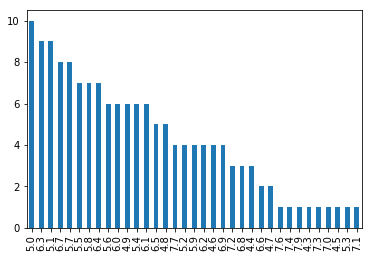

In [86]:
pd.value_counts(data1["SepalLengthCm"]).plot(kind="bar")

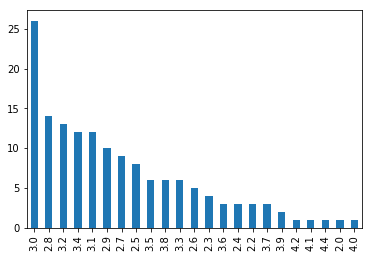

In [87]:
pd.value_counts(data1["SepalWidthCm"]).plot(kind="bar")


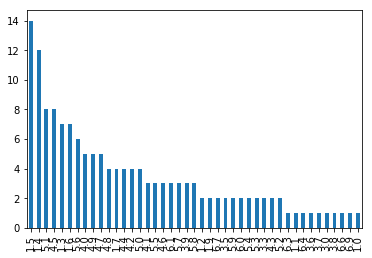

In [88]:
pd.value_counts(data1["PetalLengthCm"]).plot(kind="bar")

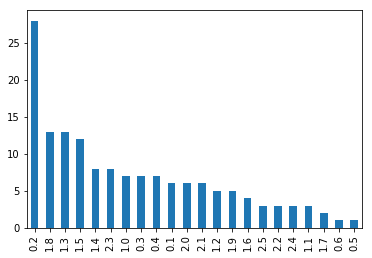

In [89]:
pd.value_counts(data1["PetalWidthCm"]).plot(kind="bar")

(0, 70)

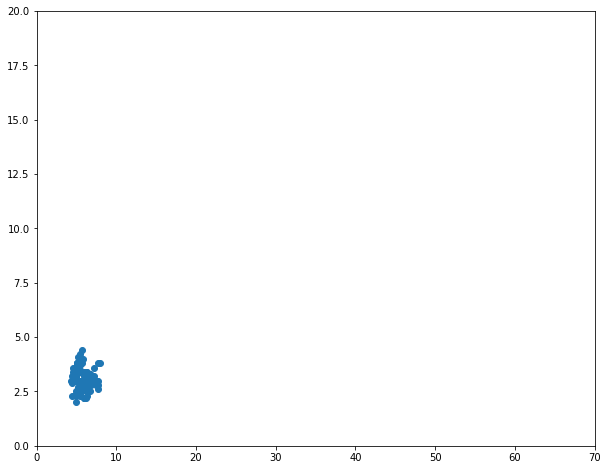

In [90]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
ax = plt.scatter(x="SepalLengthCm", y="SepalWidthCm", data=data1)
plt.ylim(0, 20)
plt.xlim(0, 70)

### Plot the distribution of target variable using histogram

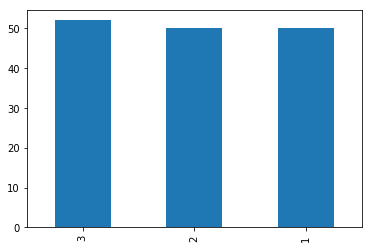

In [91]:
pd.value_counts(data1["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

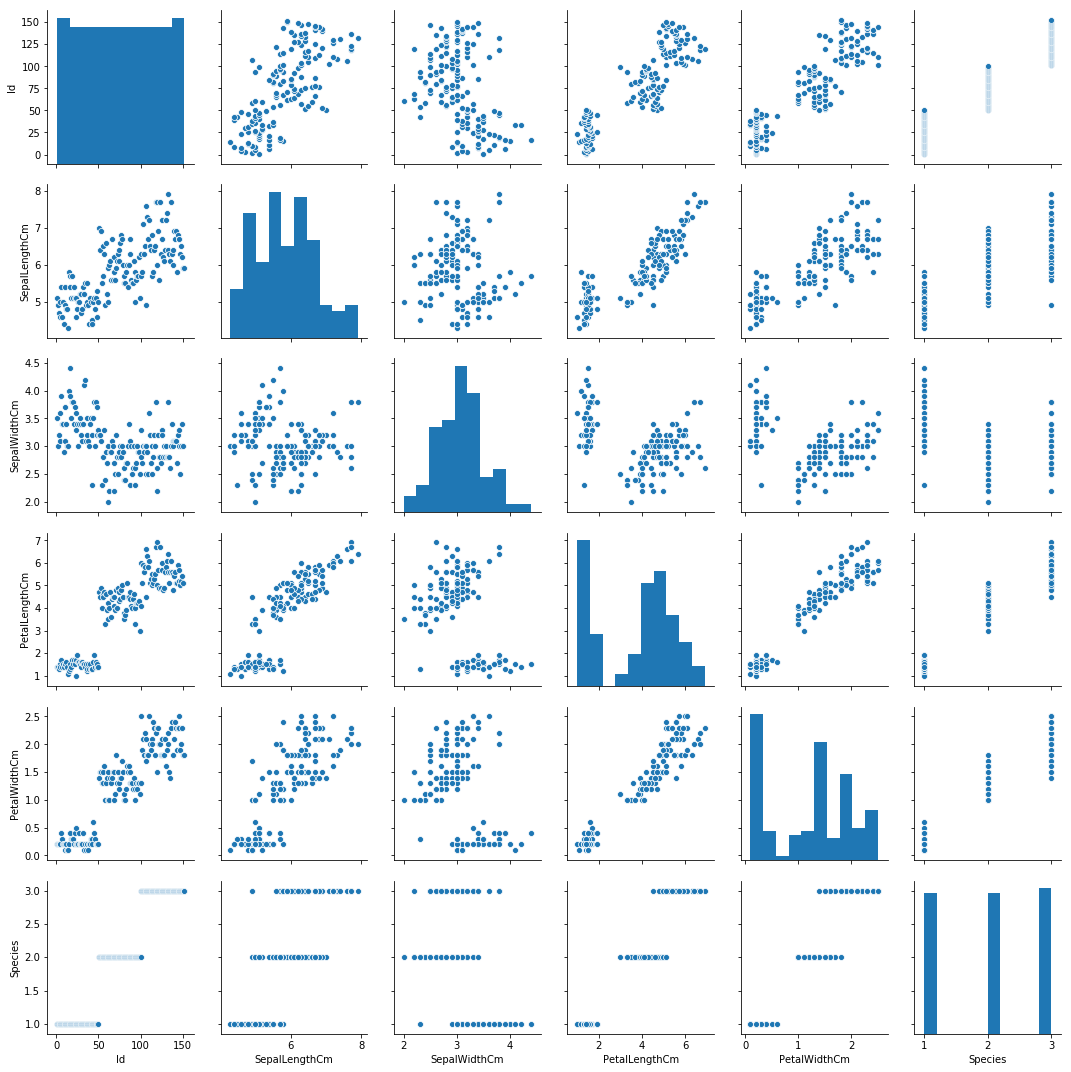

In [92]:
sns.pairplot(data1, diag_kind='auto')

### Summary Statistics and explain insights for at least 2 variables

[InternetShortcut]
URL=http://localhost:8889/notebooks/Desktop/R3_External_Lab_Logistic_and_Naive_bayes_questions.ipynb#Summary-Statistics-and-explain-insights-for-at-least-2-variables


Mean
Median
Mode


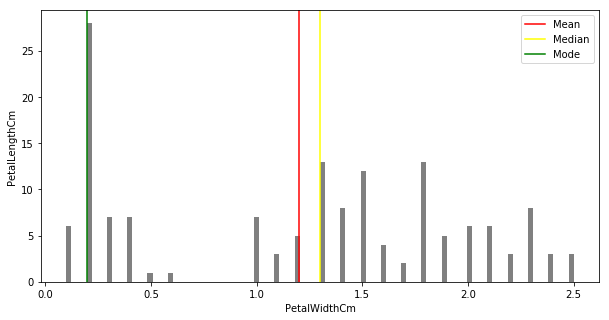

In [93]:
PetalWidthCm = data1['PetalWidthCm']

mean=PetalWidthCm.mean()
median=PetalWidthCm.median()
mode=PetalWidthCm.mode()

print ('Mean\nMedian\nMode')
plt.figure(figsize=(10,5))
plt.hist(PetalWidthCm,bins=100,color='grey')
plt.axvline(mean,color='red',label='Mean')
plt.axvline(median,color='yellow',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel('PetalWidthCm')
plt.ylabel('PetalLengthCm')
plt.legend()
plt.show()

### Correlation among all variables and give your insights

In [94]:

data1.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.710342,-0.397729,0.882747,0.897900,0.942753
SepalLengthCm,0.710342,1.000000,-0.109369,0.871754,0.817954,0.779245
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.897900,0.817954,-0.356544,0.962757,1.000000,0.956152
Species,0.942753,0.779245,-0.419446,0.949043,0.956152,1.000000


### Split data in Training and Validation in 80:20

In [111]:

from sklearn.model_selection import train_test_split
X = data1.drop(["Species"], axis=1)
y = data1[["Species"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 8)


### Do Feature Scaling

In [96]:
from sklearn import preprocessing 
  
""" MIN MAX SCALER """
  
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
  
# Scaled feature 
x_after_min_max_scaler = min_max_scaler.fit_transform(X) 
  
print ("\nAfter min max Scaling : \n", X_after_min_max_scaler) 

C:\Users\Ruchira\Anaconda4\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


NameError: name 'X_after_min_max_scaler' is not defined

### Train and Fit NaiveBayes Model

In [108]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


#Replace Species type with numbers
data1.Species.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [1, 2, 3], inplace=True)

#Initialize Gaussian Naive Bayes
clf = GaussianNB()

# Split-out validation dataset
array = df.values
X = array[:,1:5]
Y = array[:,5]

# One-third of data as a part of test set
validation_size = 0.33

seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Test options and evaluation metric
scoring = 'accuracy'

#Fitting the training set
clf.fit(X_train, Y_train) 

#Predicting for the Test Set
pred_clf = clf.predict(X_validation)

#Prediction Probability
prob_pos_clf = clf.predict_proba(X_validation)[:, 1]

#Create the prediction file by concatenation of the original data and predictions
#Reshaping needed to perform the concatenation
pred_clf_df = pd.DataFrame(pred_clf.reshape(50,1))
#Column renaming to indicate the predictions
pred_clf_df.rename(columns={0:'Prediction'}, inplace=True)

#reshaping the test dataset
X_validation_df = pd.DataFrame(X_validation.reshape(50,4))

#concatenating the two pandas dataframes over the columns to create a prediction dataset
pred_outcome = pd.concat([X_validation_df, pred_clf_df], axis=1, join_axes=[X_validation_df.index])

pred_outcome.rename(columns = {0:'SepalLengthCm', 1:'SepalWidthCm', 2:'PetalLengthCm', 3:'PetalWidthCm'}, inplace=True)

del df['Id']

#merging the prediction with original dataset
pred_comp = pd.merge(df,pred_outcome, on=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])

#print top 10 lines of the final predictions
print((pred_comp).head(10))
print ("\n")

#Save the file to csv
pred_comp.to_csv('Predictions.csv', sep=',')

#Save the file to Excel
from pandas import ExcelWriter

writer = ExcelWriter('IrisPredictions.xlsx')
pred_comp.to_excel(writer,'Sheet1')
writer.save()


#Model Performance
#setting performance parameters
kfold = model_selection.KFold(n_splits=10, random_state=seed)

#calling the cross validation function
cv_results = model_selection.cross_val_score(GaussianNB(), X_train, Y_train, cv=kfold, scoring=scoring)

#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('NB accuracy', cv_results.mean(), cv_results.std())
print(msg)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [109]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [113]:

vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
X_train_dtm.shape

(5, 5)

In [114]:
print (vect.get_feature_names()[-50:])

['id', 'petallengthcm', 'petalwidthcm', 'sepallengthcm', 'sepalwidthcm']


In [115]:
pd.DataFrame(X_train_dtm.toarray())

,0,1,2,3,4
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,1,0,0


In [116]:
vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shapevect = CountVectorizer(ngram_range=(1, 3))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(5, 5)

In [117]:
vect = CountVectorizer(ngram_range=(1, 3))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(5, 5)

In [118]:
print (vect.get_feature_names()[-50:])

['id', 'petallengthcm', 'petalwidthcm', 'sepallengthcm', 'sepalwidthcm']


In [124]:
# use default options for CountVectorizer
#vect = CountVectorizer()
vect = CountVectorizer(ngram_range=(1, 3))

# create document-term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# use Naive Bayes to predict the star rating
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy
print (metrics.accuracy_score(y_test, y_pred_class))
print(nb.score(X_test_dtm,y_test))

C:\Users\Ruchira\Anaconda4\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [5, 114]

In [125]:
y_test_binary = np.where(y_test==5, 1, 0)
max(y_test_binary.mean(), 1 - y_test_binary.mean())

1.0

In [126]:
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print ('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print("Training Accuracy")
    print(nb.score(X_train_dtm,y_train))
    print("Testing Accuracy")
    print(nb.score(X_test_dtm,y_test))

In [127]:
vect = CountVectorizer(ngram_range=(1, 6))
tokenize_test(vect)

Features:  5


C:\Users\Ruchira\Anaconda4\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [5, 114]

### Print Accuracy and Confusion Matrix and Conclude your findings